In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Research Project - EDA Milestone 

This notebook will include all my work and text for the Milestione submission.
NHIS turned out to be a very rich data source for my project. It had multiple files for mutiple survey type datasets covering various topics. I chose one of them which is the adult 2024 survey with over 600 survey like questions answered by 18+ individuals in the year 2024. 

For gaining my own domain knowledge there was also a small little ~550 row dataset that had only 8 survey questions across the years.I just wanted to verify a few things. The mental health indicators were not too different year over year which would have proably indicated issues with the survey taking process. I also wanted to make sure that the target I chose for my project is the most informative one in the sense that Adults (18+) is the age group that currently shows the most need for preventative mental healthcare. 

So to begin with I will stat with the EDA of what I am calling the `survey_dataset` followed by the EDA of the actual dataset that I will build a machine learning model off of. 

In [8]:
survey_dataset = pd.read_csv('National_Health_Interview_Survey_(NHIS)_-_Mental_Health_Indicators_20251003.csv')

In [98]:
survey_dataset.head()

,Year,Question,Demographics_Type,Demographics_Value,Percent,Low_Confidence_Interval,High_Confidence_Interval,Confidence_Interval_Formatted,Data_Source,Theme,Sentiment,Sentiment_Score
0,2024,"Because of a physical mental, or emotional con...",Age,18-34 years,12.9,11.9,13.9,12.9 (CI 11.9-13.9),NHIS,Social Participation,Negative,-2
1,2024,"Because of a physical mental, or emotional con...",Age,35-64 years,9.0,8.4,9.5,9.0 (CI 8.4-9.5),NHIS,Social Participation,Negative,-2
2,2024,"Because of a physical mental, or emotional con...",Age,65+ years,14.9,14.1,15.8,14.9 (CI 14.1-15.8),NHIS,Social Participation,Negative,-2
3,2024,"Because of a physical mental, or emotional con...",RaceEthnicity,"AI/AN, NH",19.3,13.2,26.8,19.3 (CI 13.2-26.8),NHIS,Social Participation,Negative,-2
4,2024,"Because of a physical mental, or emotional con...",RaceEthnicity,"Asian, NH",7.2,5.8,8.9,7.2 (CI 5.8-8.9),NHIS,Social Participation,Negative,-2


## Statistics Overview 

In [12]:
survey_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           556 non-null    object
 1   Question                       556 non-null    object
 2   Demographics_Type              556 non-null    object
 3   Demographics_Value             556 non-null    object
 4   Percent                        556 non-null    object
 5   Low_Confidence_Interval        556 non-null    object
 6   High_Confidence_Interval       556 non-null    object
 7   Confidence_Interval_Formatted  556 non-null    object
 8   Data_Source                    556 non-null    object
dtypes: object(9)
memory usage: 39.2+ KB


In [14]:
survey_dataset.groupby('Year')['Question'].count()

Year
2019                          78
2020                          91
2021                         104
2022                          91
2023                          91
2024                          91
July 2021 - December 2023     10
Name: Question, dtype: int64

In [20]:
survey_dataset.groupby('Question')['Data_Source'].count().reset_index()

,Question,Data_Source
0,"Because of a physical mental, or emotional con...",78
1,Composite measure of frequency and intensity o...,78
2,Composite measure of frequency and intensity o...,78
3,"During the past 12 months, did you receive cou...",78
4,Have you EVER been told by a doctor or other h...,78
5,Have you EVER been told by a doctor or other h...,78
6,How often do you get the social and emotional ...,36
7,"In general, how satisfied are you with your life?",52


In [27]:
survey_dataset.groupby(['Demographics_Type', 'Demographics_Value'])['Percent'].count()

Demographics_Type  Demographics_Value
Age                18-34 years           42
                   35-64 years           42
                   65+ years             42
RaceEthnicity      AI/AN, NH             43
                   Asian, NH             43
                   Black, NH             43
                   Hispanic              43
                   Multiple/Other, NH    43
                   NHOPI, NH             43
                   White, NH             43
Sex                Female                43
                   Male                  43
Total              Total                 43
Name: Percent, dtype: int64

#### Let me start noting down some patterns, statistics or even just hunches so I can corroborate, visualize and hypothesize later. 
- 556 rows with 9 columns - a survey style dataset with questions and there corresponding forms of answers and sources
- Most obvious description of the dataset is that there are 8 questions here and each have 78 response rows with about 6 column values that hold valuable information
- The survey is years range from 2019 to 2024
- Demogrpahics include `Age` as ranges, `RaceEthnicity` with 7 distinct values, `Sex` has binary of 'Female' and 'Male'. There is also a `Total` across both column values which implies the total of the that particular question

### The Questions Asked

In [38]:
[print(q, '\n') for q in list(survey_dataset.Question.unique())]

Because of a physical mental, or emotional condition, do you have difficulty participating in social activities such as visiting friends, attending clubs and meetings, or going to parties? 

Composite measure of frequency and intensity of feelings of anxiety: How often do you feel worried, nervous or anxious? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt worried, nervous or anxious, how would you describe the level of these feelings? Would you say a little, a lot, or somewhere in between? 

Composite measure of frequency and intensity of feelings of depression: How often do you feel depressed? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt depressed, how depressed did you feel? Would you say a little, a lot, or somewhere in between? 

During the past 12 months, did you receive counseling or therapy from a mental health professional such as a psychiatrist, psych

[None, None, None, None, None, None, None, None]

In [23]:
survey_dataset.describe() # nothing readable here :/

,Year,Question,Demographics_Type,Demographics_Value,Percent,Low_Confidence_Interval,High_Confidence_Interval,Confidence_Interval_Formatted,Data_Source
count,556,556,556,556,556,556,556,556,556
unique,7,8,4,13,251,243,263,483,2
top,2021,"Because of a physical mental, or emotional con...",RaceEthnicity,"AI/AN, NH",Suppressed,Suppressed,Suppressed,Suppressed,NHIS
freq,104,78,301,43,48,48,48,48,546


## Impute Values
- The `Percent` column had values like 'Suppresed' representing when population size was too low for a significant calculation. For now I converted them into `nan` values which will be ignored in the analysis going forward.
- My reason for disregarding them rather than trying to synthesize values is that `Percent` column is the main target that I am trying to find paterns for and if I made assumptions and averages across any demographic I believe that would be adding a heavily biased data point to the project.
- The best would be to not consider it and keep the integrity of all other data points 

In [59]:
survey_dataset['Percent'] = pd.to_numeric(survey_dataset['Percent'], errors='coerce')


### 1. DATA OVERVIEW & CLASS BALANCE


In [125]:
print("\nDataset Shape:", df_clean.shape)
print("\nMissing Data:")
print(df.isnull().sum())
print(f"\nSuppressed Values: {df['Percent'].isna().sum()} ({df['Percent'].isna().sum()/len(df)*100:.2f}%)")

print("\n--- Class Balance by Demographics_Type ---")
print(df_clean['Demographics_Type'].value_counts())
print("\nProportions:")
print(df_clean['Demographics_Type'].value_counts(normalize=True))

print("\n--- Class Balance by Demographics_Value ---")
demo_value_counts = df_clean['Demographics_Value'].value_counts()
print(demo_value_counts)

print("\n--- Class Balance by Question ---")
question_counts = df_clean['Question'].value_counts()
print(f"Number of unique questions: {len(question_counts)}")
print("\nRecords per question:")
print(question_counts)


Dataset Shape: (508, 9)

Missing Data:
Year                              0
Question                          0
Demographics_Type                 0
Demographics_Value                0
Percent                          48
Low_Confidence_Interval           0
High_Confidence_Interval          0
Confidence_Interval_Formatted     0
Data_Source                       0
dtype: int64

Suppressed Values: 48 (8.63%)

--- Class Balance by Demographics_Type ---
Demographics_Type
RaceEthnicity    253
Age              126
Sex               86
Total             43
Name: count, dtype: int64

Proportions:
Demographics_Type
RaceEthnicity    0.498031
Age              0.248031
Sex              0.169291
Total            0.084646
Name: proportion, dtype: float64

--- Class Balance by Demographics_Value ---
Demographics_Value
Asian, NH             43
Black, NH             43
Hispanic              43
Multiple/Other, NH    43
White, NH             43
Female                43
Male                  43
Total       

### 2. CORRELATION ANALYSIS

Text(120.72222222222221, 0.5, 'Questions')

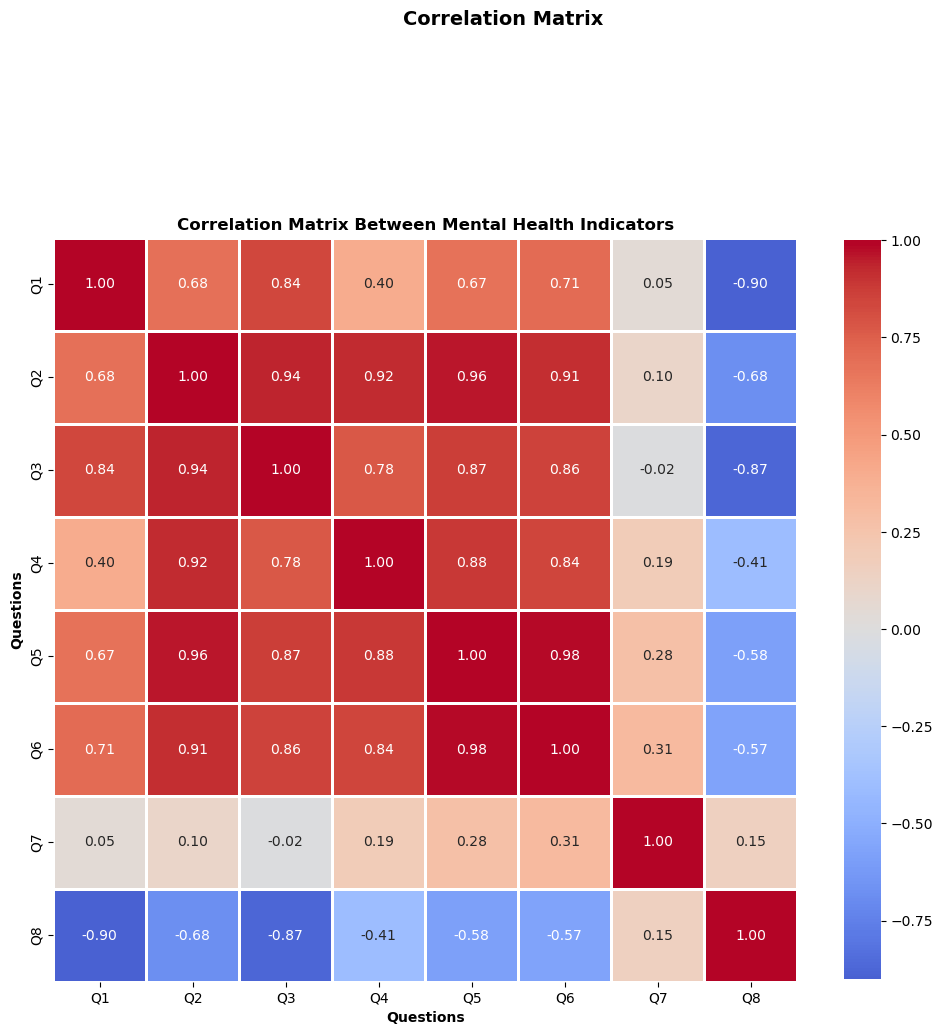

In [118]:
# Create pivot table for correlation analysis
# Rows: Demographics, Columns: Questions, Values: Percent
pivot_for_corr = df_clean.pivot_table(
    values='Percent',
    index=['Demographics_Type', 'Demographics_Value'],
    columns='Question',
    aggfunc='mean'
)

# Calculate correlation matrix between questions
correlation_matrix = pivot_for_corr.corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(12, 12))
fig.suptitle('Correlation Matrix', fontsize=14, fontweight='bold', y=0.995)

# Plot 1: Full correlation heatmap
ax1 = ax
# Shorten question labels for readability
question_labels = [f"Q{i+1}" for i in range(len(correlation_matrix))]
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=question_labels, yticklabels=question_labels, ax=ax1)
ax1.set_title('Correlation Matrix Between Mental Health Indicators', fontsize=12, fontweight='bold')
ax1.set_xlabel('Questions', fontsize=10, fontweight='bold')
ax1.set_ylabel('Questions', fontsize=10, fontweight='bold')

### 3. HIERARCHICAL CLUSTERING OF QUESTIONS


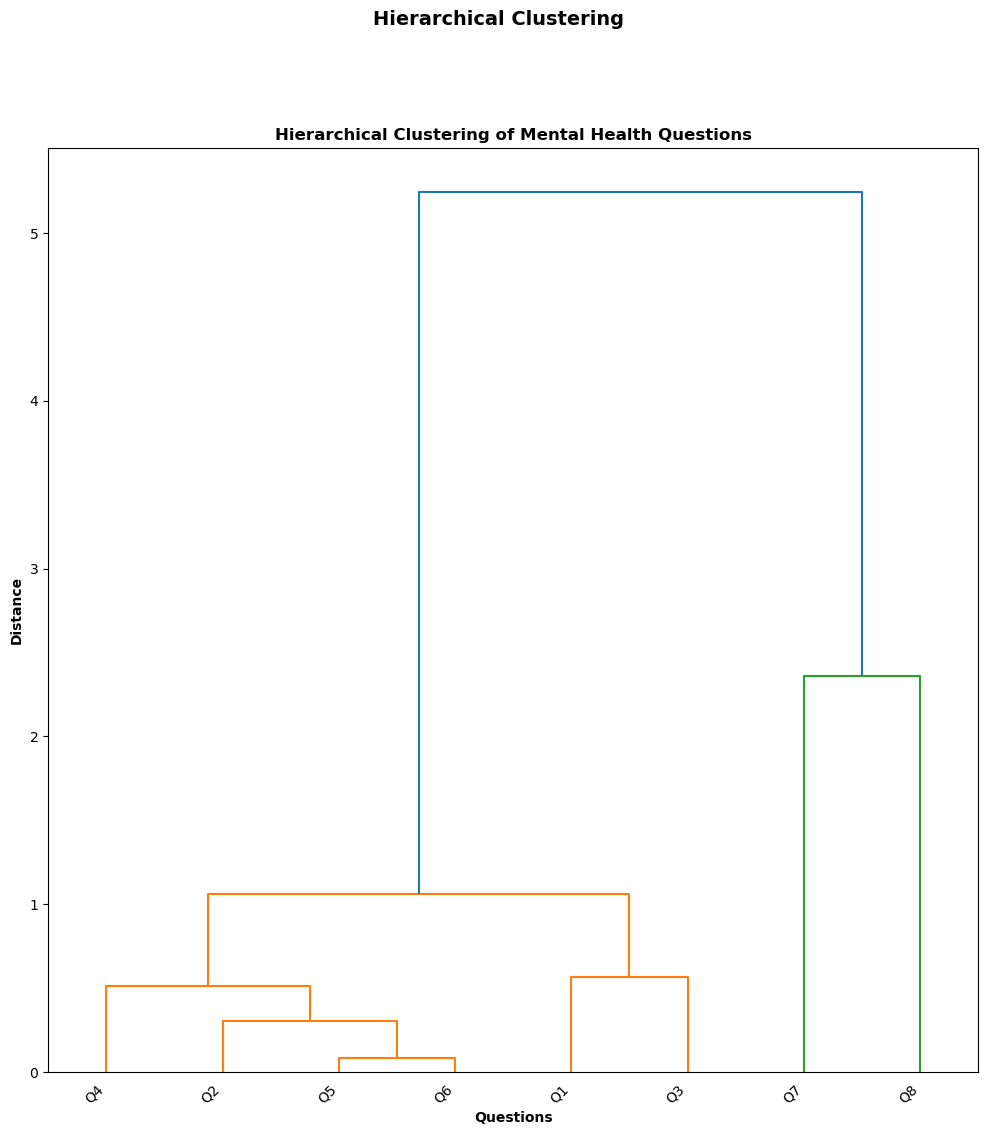

In [122]:
# Hierarchical clustering dendrogram
fig, ax = plt.subplots(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering', fontsize=14, fontweight='bold', y=0.995)

linkage_matrix = linkage(correlation_matrix, method='ward')
dendrogram(linkage_matrix, labels=question_labels, ax=ax, leaf_font_size=10)
ax.set_title('Hierarchical Clustering of Mental Health Questions', fontsize=12, fontweight='bold')
ax.set_xlabel('Questions', fontsize=10, fontweight='bold')
ax.set_ylabel('Distance', fontsize=10, fontweight='bold')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
None

### Analyzing Indicators by Age, Race, and Sex per Question 


Question mapping for Age:
Q1: Because of a physical mental, or emotional condition, do you have difficulty par...
Q2: Composite measure of frequency and intensity of feelings of anxiety: How often d...
Q3: Composite measure of frequency and intensity of feelings of depression: How ofte...
Q4: During the past 12 months, did you receive counseling or therapy from a mental h...
Q5: Have you EVER been told by a doctor or other health professional that you had an...
Q6: Have you EVER been told by a doctor or other health professional that you had an...
Q7: How often do you get the social and emotional support you need?
Q8: In general, how satisfied are you with your life?


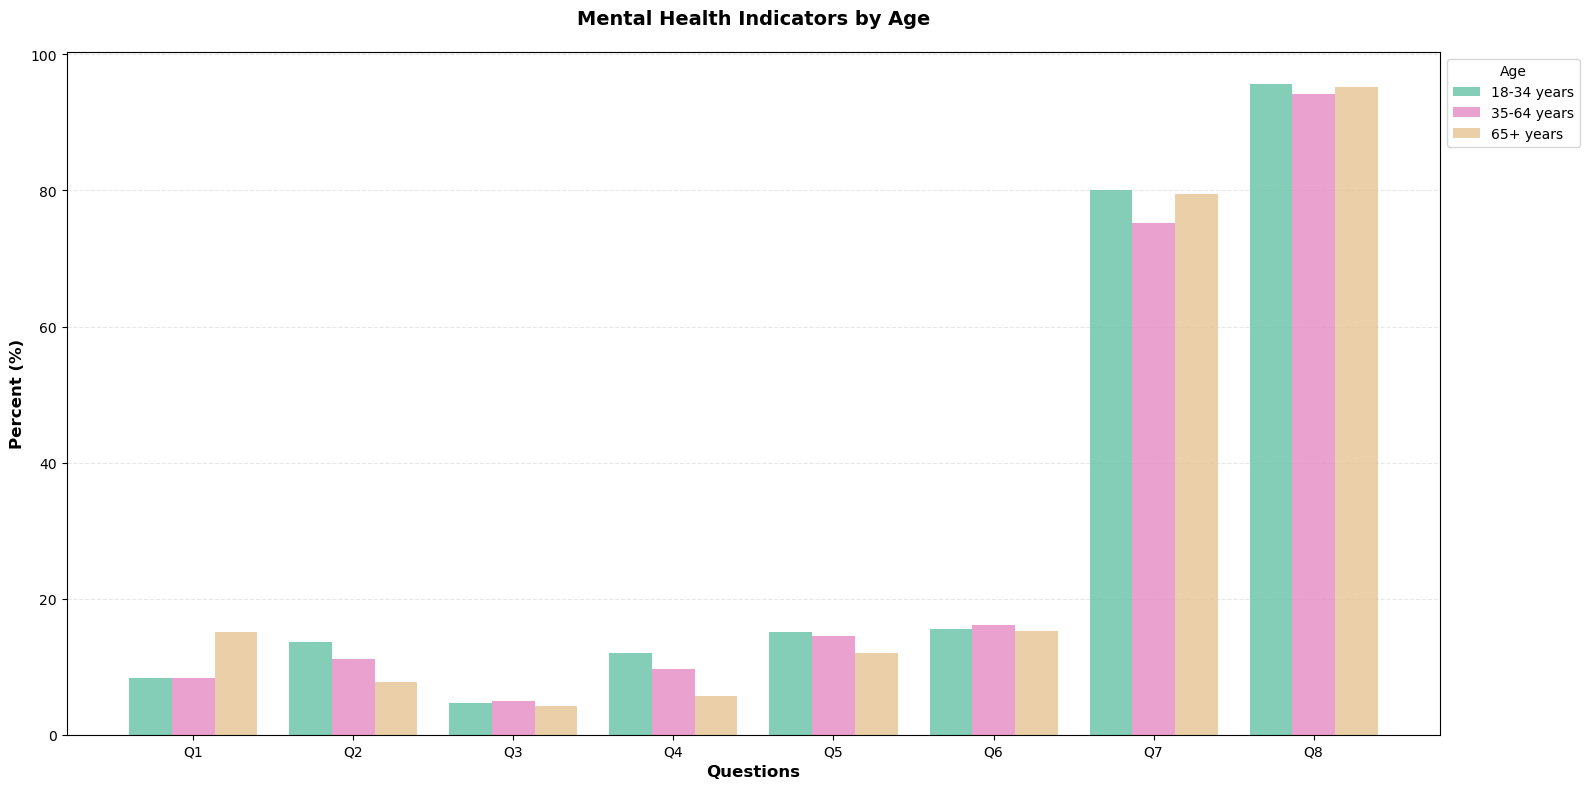


Question mapping for RaceEthnicity:
Q1: Because of a physical mental, or emotional condition, do you have difficulty par...
Q2: Composite measure of frequency and intensity of feelings of anxiety: How often d...
Q3: Composite measure of frequency and intensity of feelings of depression: How ofte...
Q4: During the past 12 months, did you receive counseling or therapy from a mental h...
Q5: Have you EVER been told by a doctor or other health professional that you had an...
Q6: Have you EVER been told by a doctor or other health professional that you had an...
Q7: How often do you get the social and emotional support you need?
Q8: In general, how satisfied are you with your life?


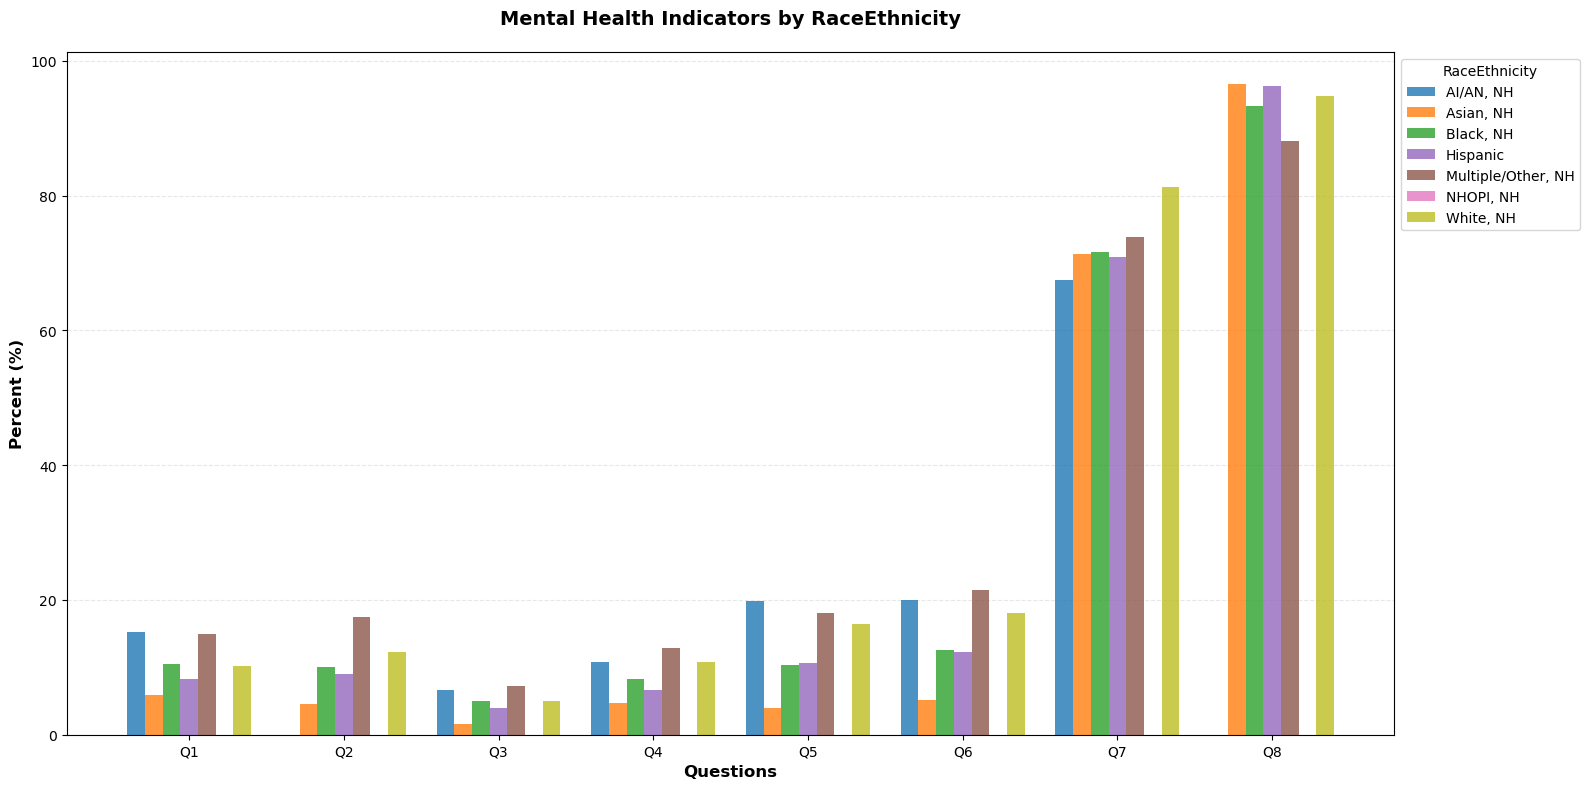


Question mapping for Sex:
Q1: Because of a physical mental, or emotional condition, do you have difficulty par...
Q2: Composite measure of frequency and intensity of feelings of anxiety: How often d...
Q3: Composite measure of frequency and intensity of feelings of depression: How ofte...
Q4: During the past 12 months, did you receive counseling or therapy from a mental h...
Q5: Have you EVER been told by a doctor or other health professional that you had an...
Q6: Have you EVER been told by a doctor or other health professional that you had an...
Q7: How often do you get the social and emotional support you need?
Q8: In general, how satisfied are you with your life?


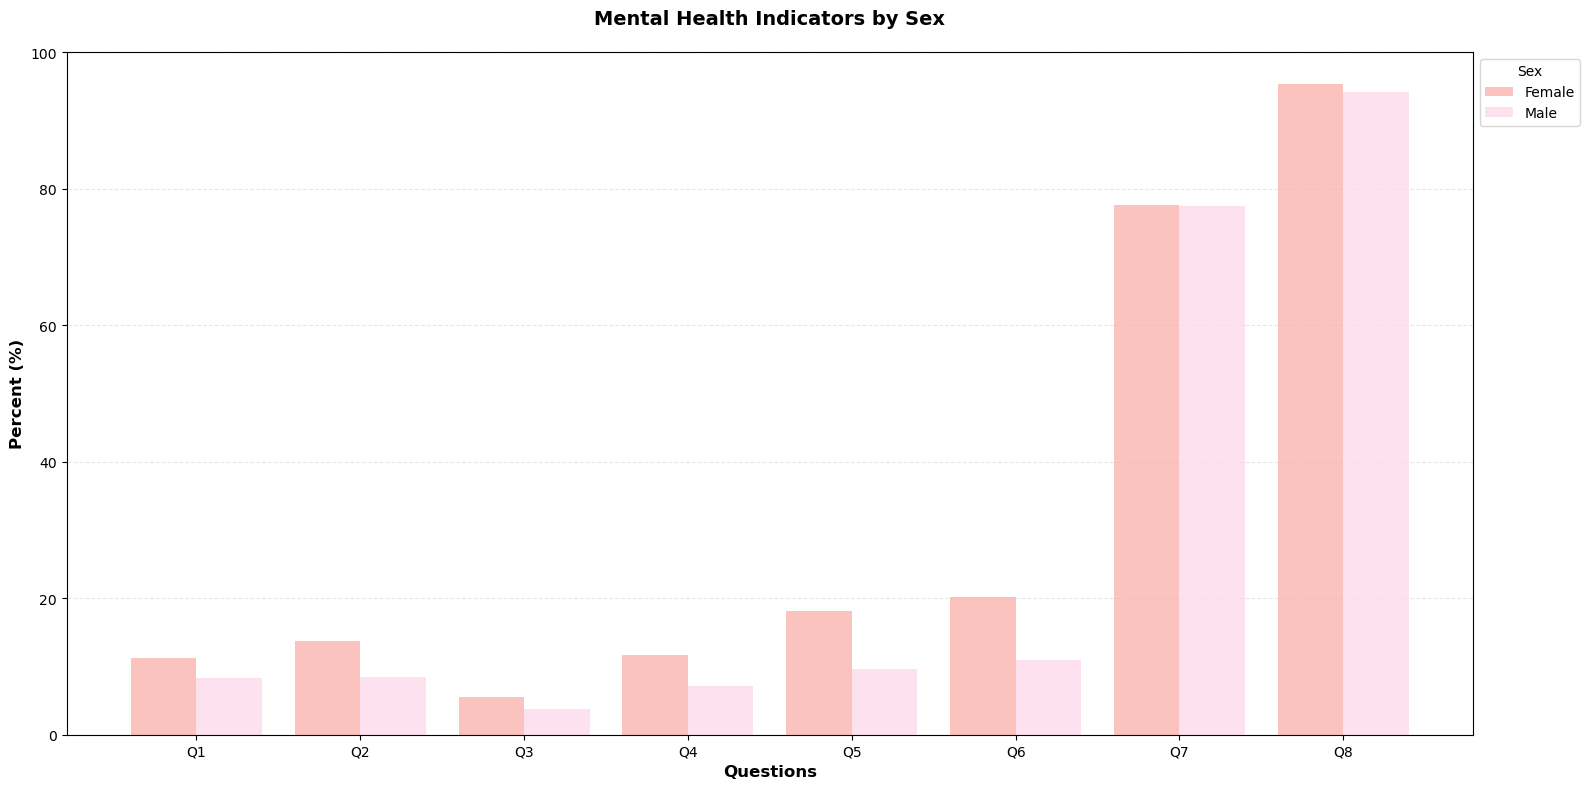

In [61]:
# Get unique demographic types (excluding 'Total')
demographic_types = [dt for dt in survey_dataset['Demographics_Type'].unique() if dt != 'Total']

# Create a color palette for each demographic type
color_palettes = {
    'Age': plt.cm.Set2,
    'RaceEthnicity': plt.cm.tab10,
    'Sex': plt.cm.Pastel1
}

# Create a figure for each demographic type
for demo_type in demographic_types:
    # Filter data for this demographic type
    demo_data = survey_dataset[survey_dataset['Demographics_Type'] == demo_type].copy()
    
    # Get unique questions and demographic values
    questions = demo_data['Question'].unique()
    demo_values = demo_data['Demographics_Value'].unique()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Set up bar positions
    x = np.arange(len(questions))
    width = 0.8 / len(demo_values)
    
    # Get color palette
    cmap = color_palettes.get(demo_type, plt.cm.tab10)
    colors = [cmap(i) for i in np.linspace(0, 0.8, len(demo_values))]
    
    # Plot bars for each demographic value
    for i, demo_val in enumerate(demo_values):
        subset = demo_data[demo_data['Demographics_Value'] == demo_val]
        
        # Create a mapping of questions to percent values
        values_dict = dict(zip(subset['Question'], subset['Percent']))
        values = [values_dict.get(q, 0) for q in questions]
        
        offset = (i - len(demo_values)/2) * width + width/2
        ax.bar(x + offset, values, width, label=demo_val, color=colors[i], alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Questions', fontsize=12, fontweight='bold')
    ax.set_ylabel('Percent (%)', fontsize=12, fontweight='bold')
    ax.set_title(f'Mental Health Indicators by {demo_type}', fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis labels (abbreviated questions)
    question_labels = [f'Q{i+1}' for i in range(len(questions))]
    ax.set_xticks(x)
    ax.set_xticklabels(question_labels, rotation=0)
    
    # Add legend
    ax.legend(title=demo_type, loc='upper left', bbox_to_anchor=(1, 1))
    
    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Print question mapping for reference
    print(f"\n{'='*80}")
    print(f"Question mapping for {demo_type}:")
    print('='*80)
    for i, q in enumerate(questions):
        print(f"Q{i+1}: {q[:80]}{'...' if len(q) > 80 else ''}")
    
    plt.show()
None

### What the analysis is telling us 

In [ ]:
# Function to categorize questions by theme using NLP keyword matching
def categorize_question(question):
    """Use keyword-based NLP to determine the theme of a question"""
    q_lower = question.lower()
    
    if 'anxiety' in q_lower or 'anxious' in q_lower or 'worried' in q_lower or 'nervous' in q_lower:
        if 'told by a doctor' in q_lower:
            return 'Anxiety_Rec'
        return 'Anxiety'
    elif 'depression' in q_lower or 'depressed' in q_lower:
        if 'told by a doctor' in q_lower:
            return 'Depression_Rec'
        return 'Depression'
    elif 'social activities' in q_lower or 'difficulty participating' in q_lower:
        return 'Social Participation'
    elif 'counseling' in q_lower or 'therapy' in q_lower or 'mental health professional' in q_lower:
        return 'Treatment/Care'
    elif 'social and emotional support' in q_lower:
        return 'Social Support'
    elif 'satisfied' in q_lower or 'life satisfaction' in q_lower:
        return 'Life Satisfaction'
    else:
        return 'General Mental Health'

## Trend Analysis over the years per Demoogrpahic. Plotted for each theme of question


Questions and Themes for Age:
1. [Social Participation] Because of a physical mental, or emotional condition, do you have difficulty participating in social activities such as visiting friends, attending clubs and meetings, or going to parties?

2. [Anxiety] Composite measure of frequency and intensity of feelings of anxiety: How often do you feel worried, nervous or anxious? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt worried, nervous or anxious, how would you describe the level of these feelings? Would you say a little, a lot, or somewhere in between?

3. [Depression] Composite measure of frequency and intensity of feelings of depression: How often do you feel depressed? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt depressed, how depressed did you feel? Would you say a little, a lot, or somewhere in between?

4. [Treatment/Care] During the past 12 months

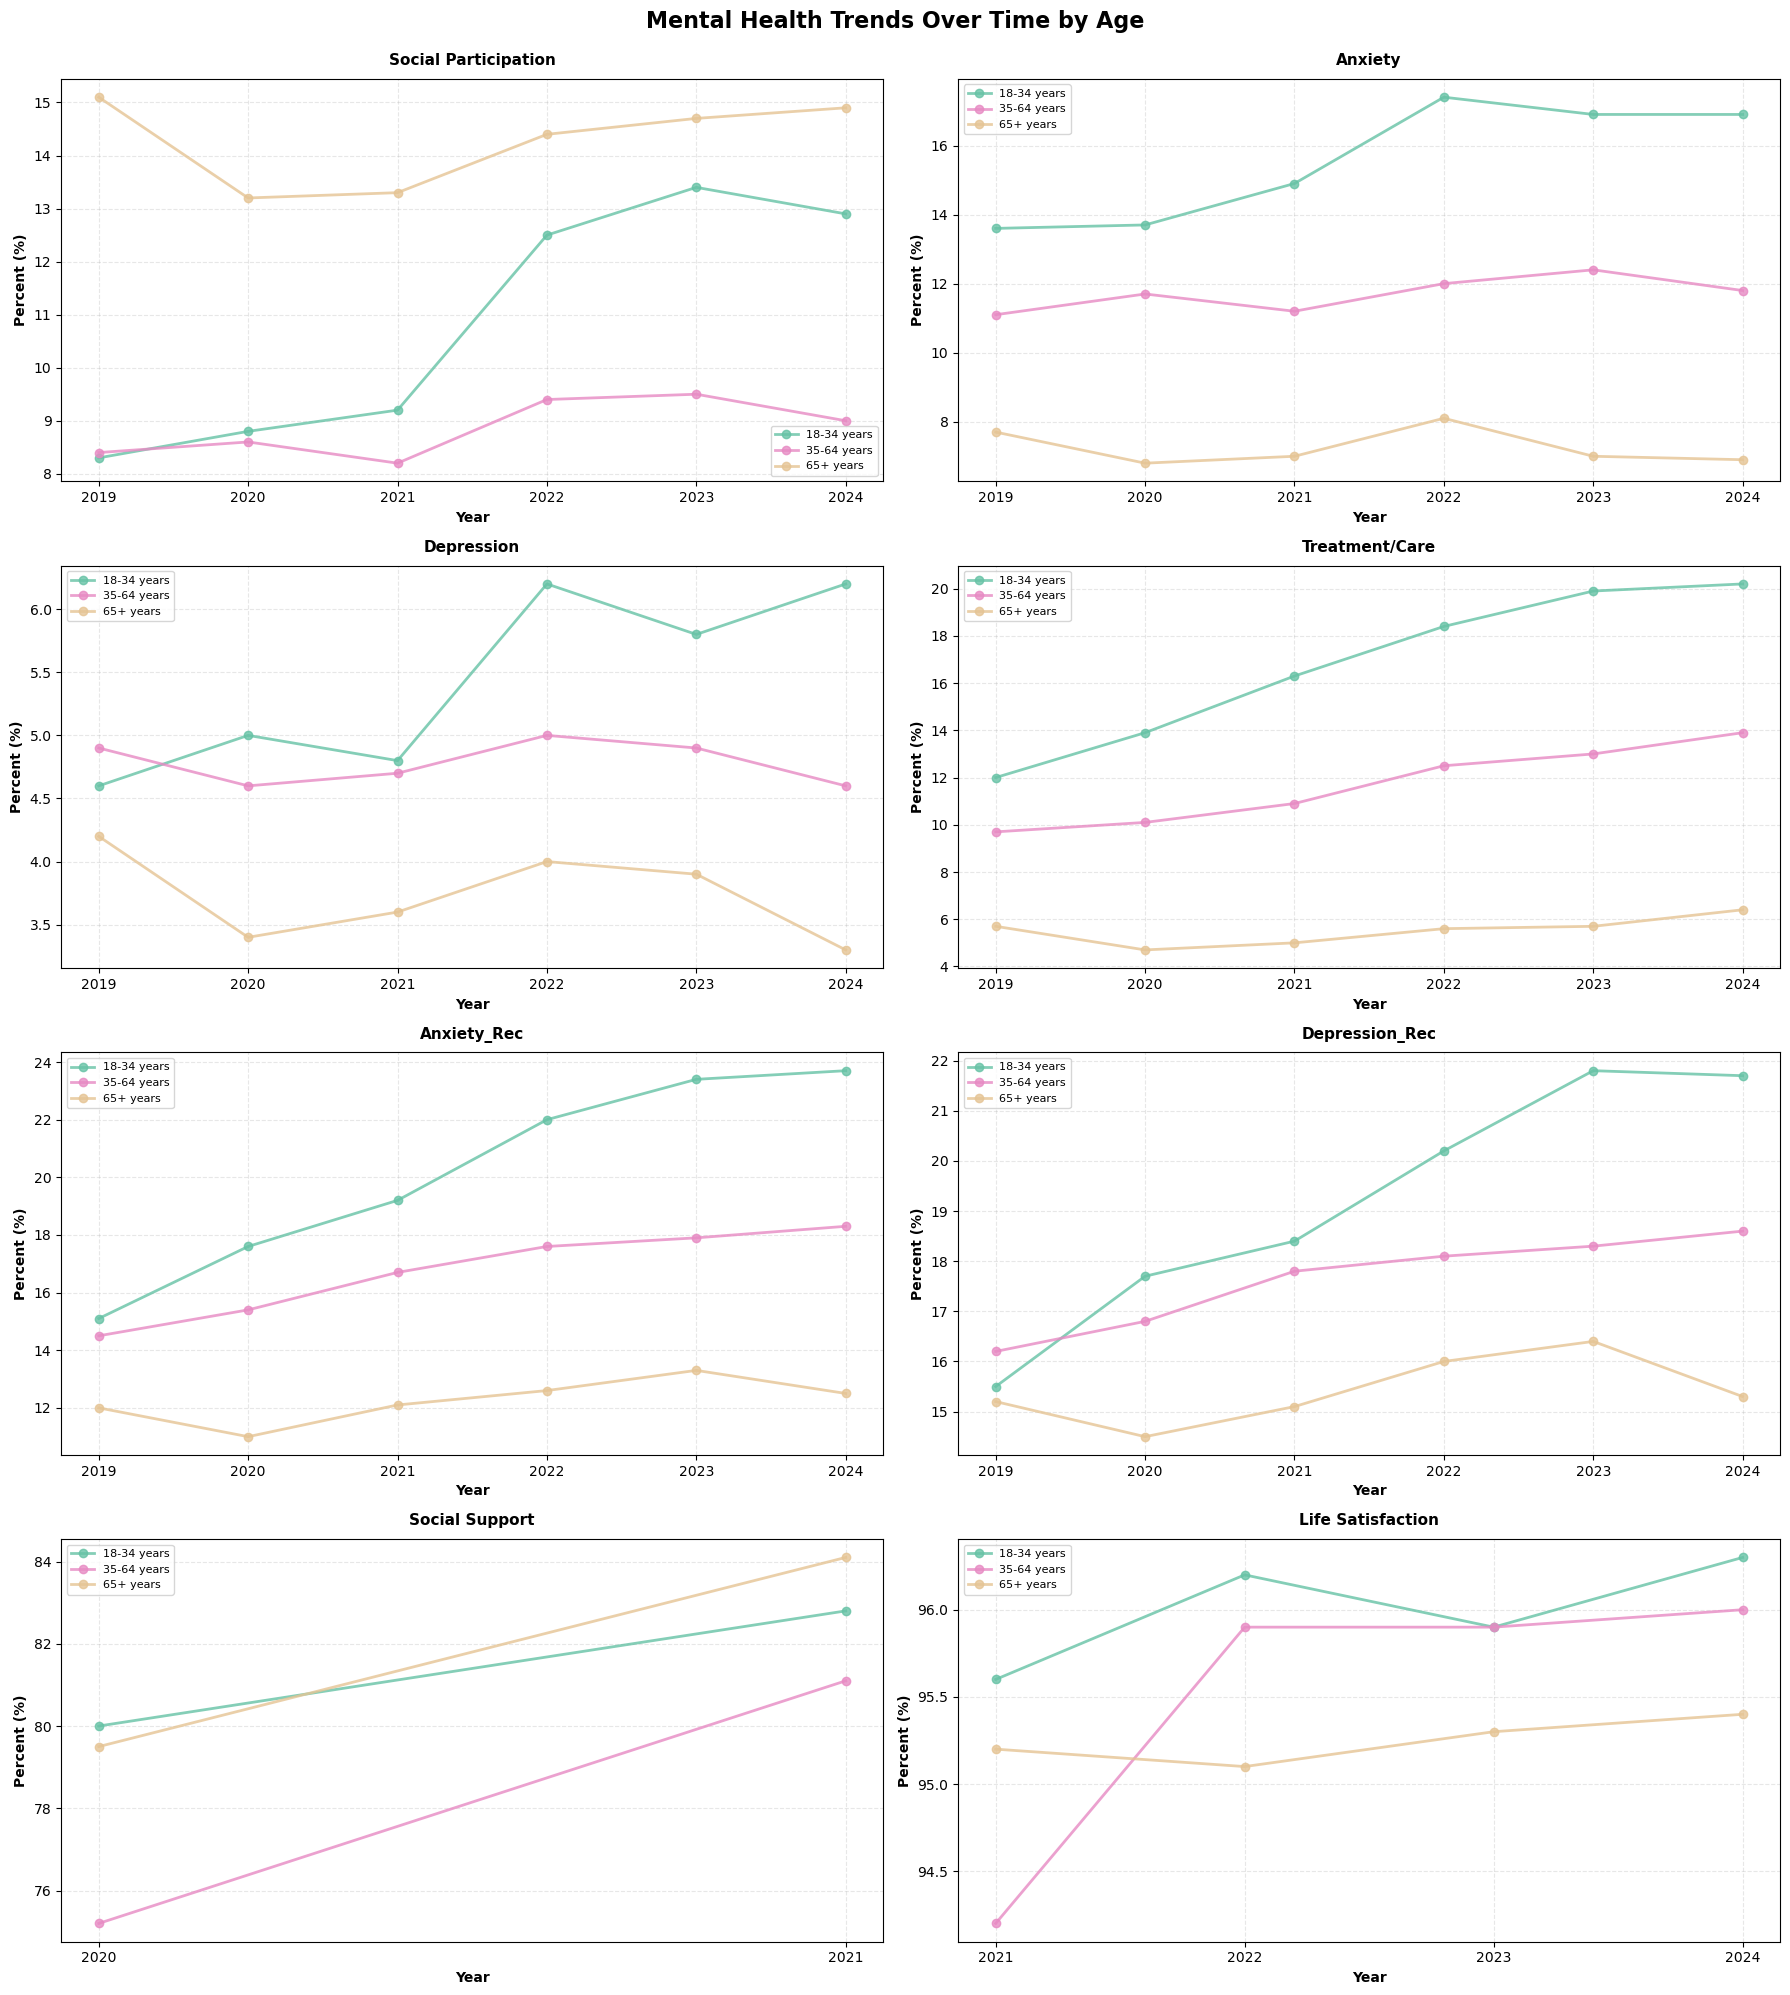


Questions and Themes for RaceEthnicity:
1. [Social Participation] Because of a physical mental, or emotional condition, do you have difficulty participating in social activities such as visiting friends, attending clubs and meetings, or going to parties?

2. [Anxiety] Composite measure of frequency and intensity of feelings of anxiety: How often do you feel worried, nervous or anxious? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt worried, nervous or anxious, how would you describe the level of these feelings? Would you say a little, a lot, or somewhere in between?

3. [Depression] Composite measure of frequency and intensity of feelings of depression: How often do you feel depressed? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt depressed, how depressed did you feel? Would you say a little, a lot, or somewhere in between?

4. [Treatment/Care] During the past

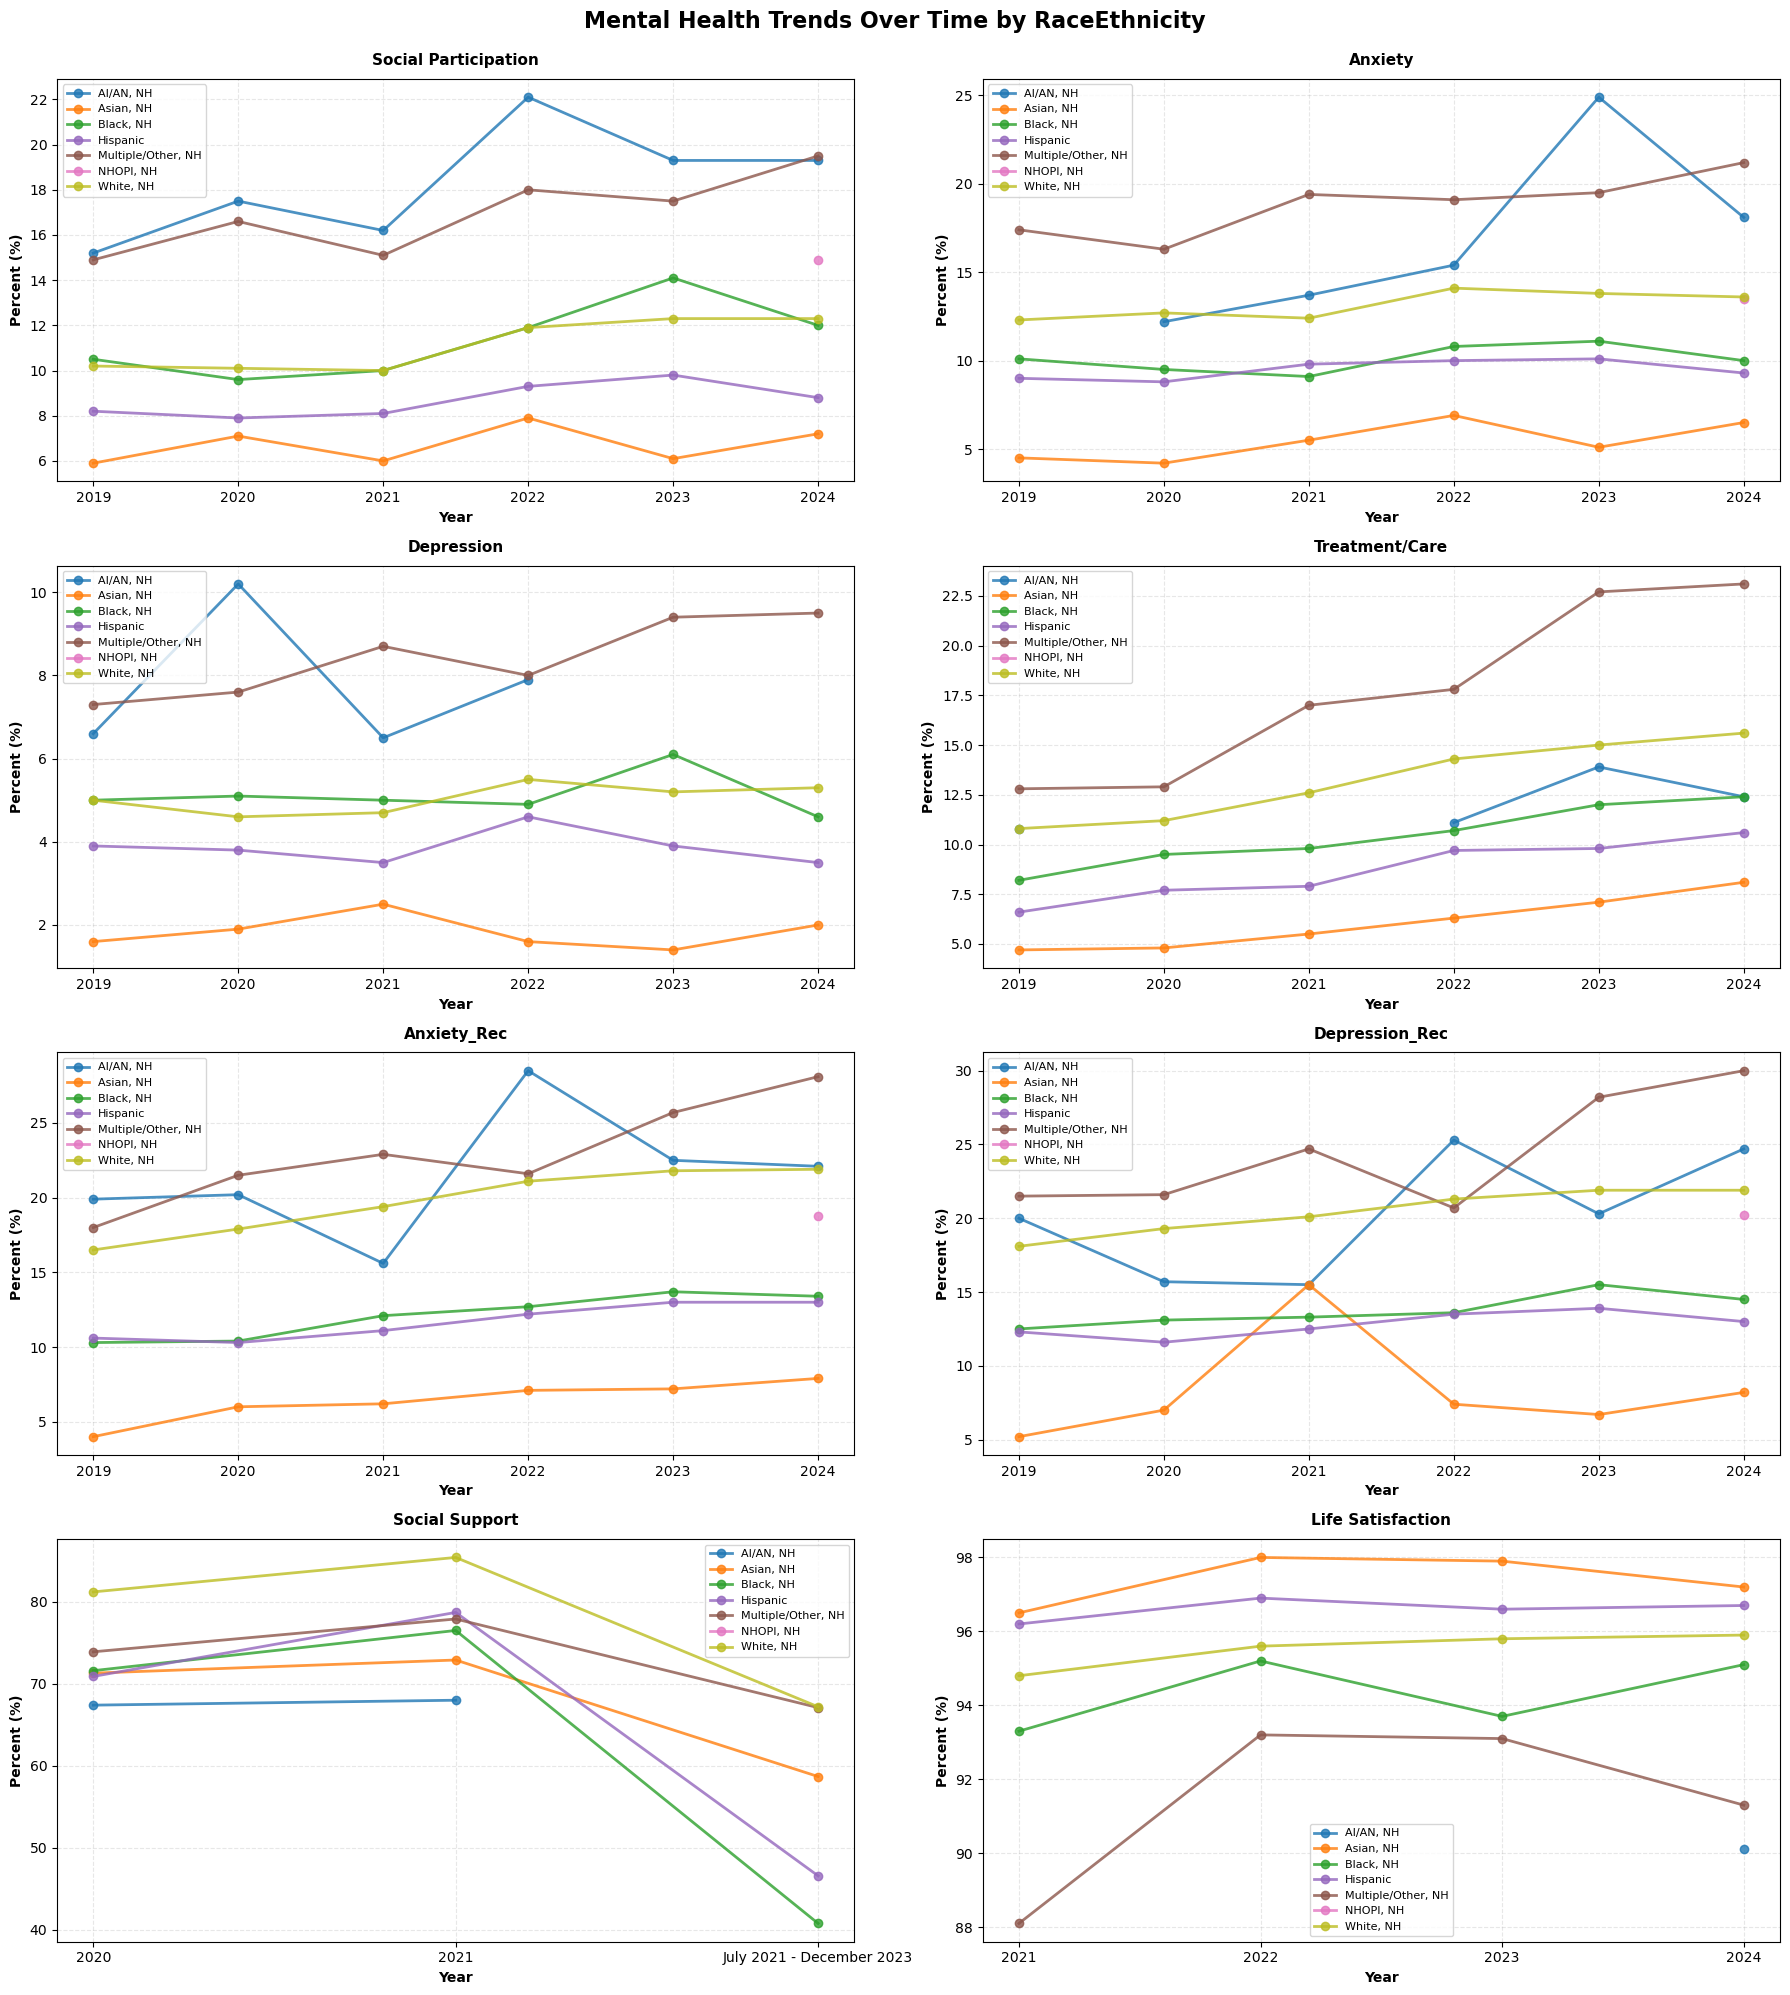


Questions and Themes for Sex:
1. [Social Participation] Because of a physical mental, or emotional condition, do you have difficulty participating in social activities such as visiting friends, attending clubs and meetings, or going to parties?

2. [Anxiety] Composite measure of frequency and intensity of feelings of anxiety: How often do you feel worried, nervous or anxious? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt worried, nervous or anxious, how would you describe the level of these feelings? Would you say a little, a lot, or somewhere in between?

3. [Depression] Composite measure of frequency and intensity of feelings of depression: How often do you feel depressed? Would you say daily, weekly, monthly, a few times a year, or never? AND Thinking about the last time you felt depressed, how depressed did you feel? Would you say a little, a lot, or somewhere in between?

4. [Treatment/Care] During the past 12 months

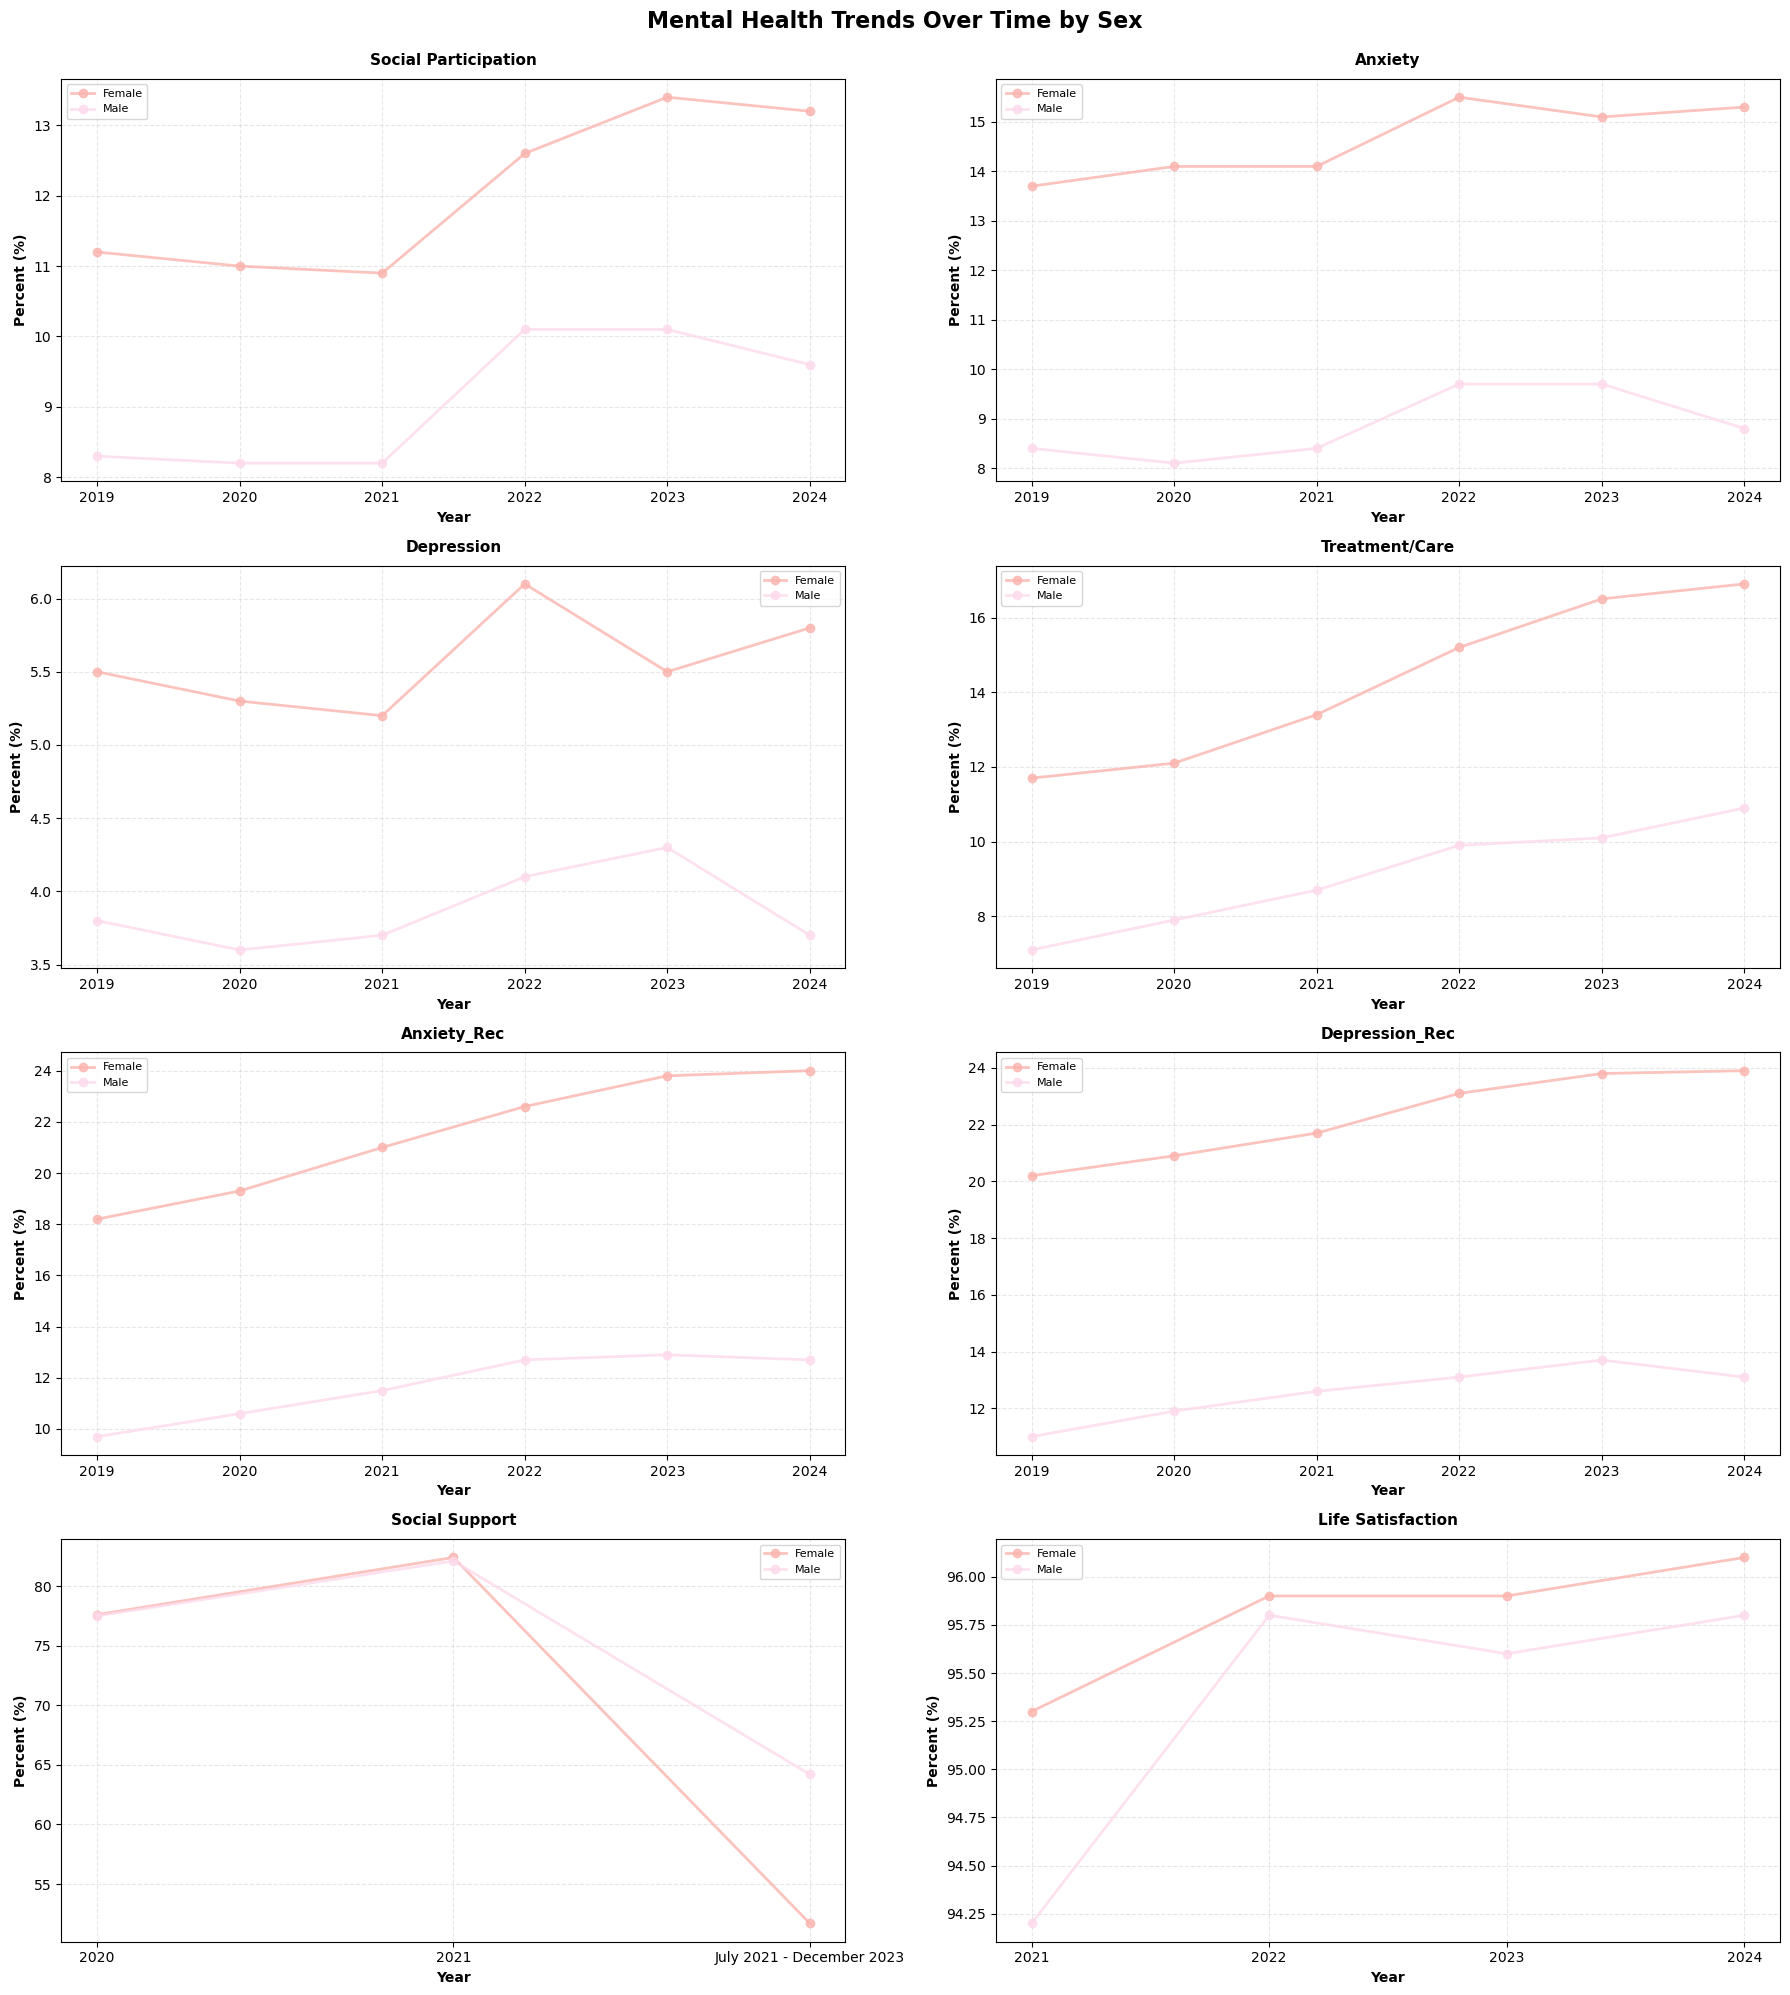

In [79]:
# Add theme column to dataframe
survey_dataset['Theme'] = survey_dataset['Question'].apply(categorize_question)

# Get unique demographic types (excluding 'Total')
demographic_types = [dt for dt in survey_dataset['Demographics_Type'].unique() if dt != 'Total']

# Color palettes for different demographic values
color_palettes = {
    'Age': plt.cm.Set2,
    'RaceEthnicity': plt.cm.tab10,
    'Sex': plt.cm.Pastel1
}

# Get all unique questions
all_questions = survey_dataset['Question'].unique()

# Create line charts for each demographic type
for demo_type in demographic_types:
    # Filter data for this demographic type
    demo_data = survey_dataset[survey_dataset['Demographics_Type'] == demo_type].copy()
    
    # Get unique demographic values
    demo_values = demo_data['Demographics_Value'].unique()
    
    # Get color palette
    cmap = color_palettes.get(demo_type, plt.cm.tab10)
    colors = [cmap(i) for i in np.linspace(0, 0.8, len(demo_values))]
    color_map = dict(zip(demo_values, colors))
    
    # Create a subplot for each question
    n_questions = len(all_questions)
    n_cols = 2
    n_rows = (n_questions + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    fig.suptitle(f'Mental Health Trends Over Time by {demo_type}', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    # Flatten axes array for easier iteration
    axes_flat = axes.flatten() if n_questions > 1 else [axes]
    
    for idx, question in enumerate(all_questions):
        ax = axes_flat[idx]
        
        # Filter data for this question
        question_data = demo_data[demo_data['Question'] == question]
        
        # Get theme for this question
        theme = categorize_question(question)
        
        # Plot line for each demographic value
        for demo_val in demo_values:
            subset = question_data[question_data['Demographics_Value'] == demo_val]
            
            if len(subset) > 0:
                # Sort by year
                subset_sorted = subset.sort_values('Year')
                
                # Plot line with markers
                ax.plot(subset_sorted['Year'], subset_sorted['Percent'], 
                       marker='o', linewidth=2, markersize=6,
                       label=demo_val, color=color_map[demo_val], alpha=0.8)
        
        # Customize subplot
        ax.set_xlabel('Year', fontsize=10, fontweight='bold')
        ax.set_ylabel('Percent (%)', fontsize=10, fontweight='bold')
        ax.set_title(f'{theme}', fontsize=11, fontweight='bold', pad=10)
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        # Format x-axis to show years as integers
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Hide any unused subplots
    for idx in range(len(all_questions), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    
    # Print question details
    print(f"\n{'='*80}")
    print(f"Questions and Themes for {demo_type}:")
    print('='*80)
    for i, q in enumerate(all_questions):
        theme = categorize_question(q)
        print(f"{i+1}. [{theme}] {q}\n")
    
    plt.show()

None

### Analysis of Trend charts

## Sentiment Analysis 


QUESTION SENTIMENT ANALYSIS

Sentiment: Negative (Score: -2)
Question: Because of a physical mental, or emotional condition, do you have difficult...

Sentiment: Negative (Score: -3)
Question: Composite measure of frequency and intensity of feelings of anxiety: How of...

Sentiment: Negative (Score: -1)
Question: Composite measure of frequency and intensity of feelings of depression: How...

Sentiment: Positive (Score: 3)
Question: During the past 12 months, did you receive counseling or therapy from a men...

Sentiment: Negative (Score: -1)
Question: Have you EVER been told by a doctor or other health professional that you h...

Sentiment: Neutral (Score: 0)
Question: Have you EVER been told by a doctor or other health professional that you h...

Sentiment: Positive (Score: 3)
Question: How often do you get the social and emotional support you need?...

Sentiment: Positive (Score: 1)
Question: In general, how satisfied are you with your life?...

SENTIMENT DISTRIBUTION
Sentiment
Nega

/var/folders/9c/0pfj11j968532nz4j_mk_xfr0000gp/T/ipykernel_22759/2380837583.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(sentiment_data, labels=sentiments, patch_artist=True)


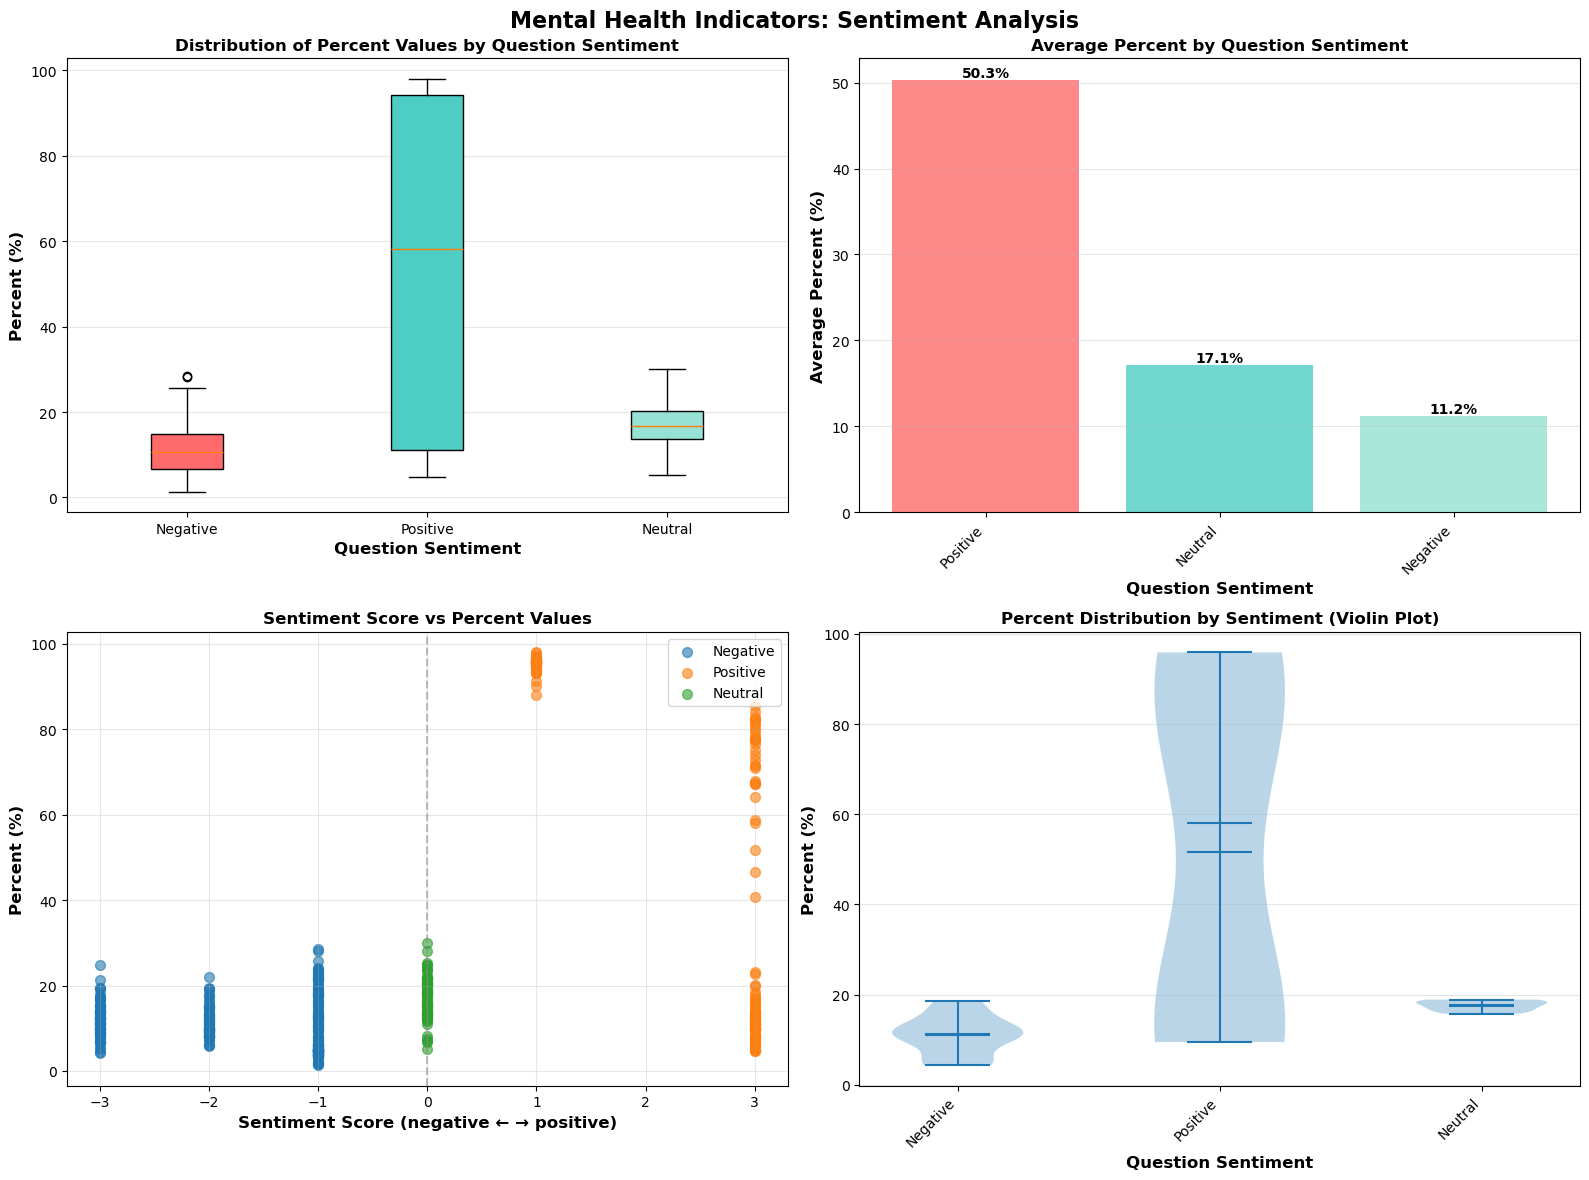


CORRELATION ANALYSIS

Correlation between Sentiment Score and Percent:
                 Sentiment_Score   Percent
Sentiment_Score         1.000000  0.414492
Percent                 0.414492  1.000000

AVERAGE PERCENT BY SENTIMENT AND DEMOGRAPHIC TYPE
Demographics_Type        Age  RaceEthnicity        Sex      Total
Sentiment                                                        
Negative           10.965278      11.495139  10.902083  10.979167
Neutral            17.422222      16.764865  17.416667  17.566667
Positive           50.933333      49.343056  51.557692  51.592308

Analysis complete!


In [73]:
# Function to analyze sentiment of questions using keyword-based NLP
def analyze_sentiment(question):
    """
    Analyze the sentiment of a question based on keywords.
    Returns a sentiment label and score.
    """
    q_lower = question.lower()
    
    # Negative sentiment keywords (indicating problems, difficulties, negative states)
    negative_words = [
        'difficulty', 'problem', 'worried', 'nervous', 'anxious', 'depressed',
        'disorder', 'unable', 'cannot', 'struggle', 'hard', 'challenging',
        'difficulty participating'
    ]
    
    # Positive sentiment keywords (indicating support, care, satisfaction)
    positive_words = [
        'satisfied', 'support', 'receive', 'help', 'care', 'therapy',
        'counseling', 'get', 'need'
    ]
    
    # Count sentiment indicators
    negative_count = sum(1 for word in negative_words if word in q_lower)
    positive_count = sum(1 for word in positive_words if word in q_lower)
    
    # Determine overall sentiment
    if negative_count > positive_count:
        return 'Negative', -negative_count
    elif positive_count > negative_count:
        return 'Positive', positive_count
    elif negative_count == positive_count and negative_count > 0:
        return 'Mixed', 0
    else:
        return 'Neutral', 0

# Apply sentiment analysis to each question
survey_dataset['Sentiment'], survey_dataset['Sentiment_Score'] = zip(*survey_dataset['Question'].apply(analyze_sentiment))

# Display sentiment analysis summary
print("\n" + "="*80)
print("QUESTION SENTIMENT ANALYSIS")
print("="*80)

unique_questions = survey_dataset[['Question', 'Sentiment', 'Sentiment_Score']].drop_duplicates()
for idx, row in unique_questions.iterrows():
    print(f"\nSentiment: {row['Sentiment']} (Score: {row['Sentiment_Score']})")
    print(f"Question: {row['Question'][:75]}...")

# Summary statistics
print("\n" + "="*80)
print("SENTIMENT DISTRIBUTION")
print("="*80)
sentiment_counts = survey_dataset['Sentiment'].value_counts()
print(sentiment_counts)

# Remove NaN values for analysis
df_clean = survey_dataset.dropna(subset=['Percent'])

print("\n" + "="*80)
print("AVERAGE PERCENT BY SENTIMENT")
print("="*80)
avg_by_sentiment = df_clean.groupby('Sentiment')['Percent'].agg(['mean', 'median', 'std', 'count'])
print(avg_by_sentiment)

# Titling the plots 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Mental Health Indicators: Sentiment Analysis', fontsize=16, fontweight='bold')

# 1. Box plot: Percent by Sentiment
ax1 = axes[0, 0]
sentiments = df_clean['Sentiment'].unique()
sentiment_data = [df_clean[df_clean['Sentiment'] == s]['Percent'].values for s in sentiments]
bp = ax1.boxplot(sentiment_data, labels=sentiments, patch_artist=True)
colors = ['#ff6b6b', '#4ecdc4', '#95e1d3', '#ffd93d']
for patch, color in zip(bp['boxes'], colors[:len(sentiments)]):
    patch.set_facecolor(color)
ax1.set_ylabel('Percent (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Question Sentiment', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Percent Values by Question Sentiment', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Bar plot: Average Percent by Sentiment
ax2 = axes[0, 1]
avg_percent = df_clean.groupby('Sentiment')['Percent'].mean().sort_values(ascending=False)
bars = ax2.bar(range(len(avg_percent)), avg_percent.values, color=colors[:len(avg_percent)], alpha=0.8)
ax2.set_xticks(range(len(avg_percent)))
ax2.set_xticklabels(avg_percent.index, rotation=45, ha='right')
ax2.set_ylabel('Average Percent (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Question Sentiment', fontsize=12, fontweight='bold')
ax2.set_title('Average Percent by Question Sentiment', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Scatter plot: Sentiment Score vs Percent
ax3 = axes[1, 0]
for sentiment in sentiments:
    subset = df_clean[df_clean['Sentiment'] == sentiment]
    ax3.scatter(subset['Sentiment_Score'], subset['Percent'], 
               label=sentiment, alpha=0.6, s=50)
ax3.set_xlabel('Sentiment Score (negative ← → positive)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Percent (%)', fontsize=12, fontweight='bold')
ax3.set_title('Sentiment Score vs Percent Values', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
ax3.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# 4. Violin plot: Percent distribution by Sentiment and Demographics
ax4 = axes[1, 1]
# Use only Total demographic for cleaner visualization
df_total = df_clean[df_clean['Demographics_Type'] == 'Total']
if len(df_total) > 0:
    parts = ax4.violinplot([df_total[df_total['Sentiment'] == s]['Percent'].values 
                            for s in sentiments if s in df_total['Sentiment'].unique()],
                           positions=range(len([s for s in sentiments if s in df_total['Sentiment'].unique()])),
                           showmeans=True, showmedians=True)
    ax4.set_xticks(range(len([s for s in sentiments if s in df_total['Sentiment'].unique()])))
    ax4.set_xticklabels([s for s in sentiments if s in df_total['Sentiment'].unique()], rotation=45, ha='right')
else:
    # If no Total data, use all data
    parts = ax4.violinplot([df_clean[df_clean['Sentiment'] == s]['Percent'].values 
                            for s in sentiments],
                           positions=range(len(sentiments)),
                           showmeans=True, showmedians=True)
    ax4.set_xticks(range(len(sentiments)))
    ax4.set_xticklabels(sentiments, rotation=45, ha='right')
ax4.set_ylabel('Percent (%)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Question Sentiment', fontsize=12, fontweight='bold')
ax4.set_title('Percent Distribution by Sentiment (Violin Plot)', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical correlation analysis
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)
correlation = df_clean[['Sentiment_Score', 'Percent']].corr()
print(f"\nCorrelation between Sentiment Score and Percent:")
print(correlation)

# Breakdown by demographic type
print("\n" + "="*80)
print("AVERAGE PERCENT BY SENTIMENT AND DEMOGRAPHIC TYPE")
print("="*80)
pivot_table = df_clean.pivot_table(
    values='Percent', 
    index='Sentiment', 
    columns='Demographics_Type', 
    aggfunc='mean'
)
print(pivot_table)


In [ ]:
bbb

In [89]:
dataset = pd.read_csv('adult24.csv')


In [91]:
dataset

,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,PPSU,PSTRAT,WLKLEISTC_A,WLKTRANTC_A,HISPALLP_A,RACEALLP_A,ANYDIFF_A,...,LSATIS4_A,PHSTAT_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,AVGNUMCIG_A,WTFA_A,HHX,POVRATTC_A
0,9,0,2,2,122,NaN,NaN,2,1,2,...,1,1,1,1,10,1,30,5780.565,H067658,2.82
1,8,0,0,2,122,20.0,NaN,2,1,2,...,2,2,1,1,10,1,20,3994.244,H076577,2.01
2,7,0,0,2,122,30.0,NaN,2,1,1,...,1,2,1,1,10,1,20,6636.755,H019335,1.90
3,12,0,0,2,122,10.0,NaN,2,1,1,...,2,3,1,1,10,1,01,13767.420,H012701,4.48
4,14,0,0,1,115,NaN,NaN,3,2,1,...,2,3,1,1,10,1,NaN,18880.030,H049678,6.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32624,10,0,0,98,114,30.0,NaN,2,1,1,...,2,3,1,12,10,1,99,1348.197,H068650,3.18
32625,14,0,0,103,114,40.0,NaN,2,1,1,...,2,1,1,12,10,1,NaN,1030.453,H062337,9.80
32626,14,0,0,103,114,NaN,30.0,2,1,2,...,1,1,1,12,10,1,NaN,1648.080,H005264,6.86
32627,8,0,0,103,114,30.0,NaN,4,3,2,...,2,2,1,12,10,1,NaN,1349.389,H034334,2.44


In [93]:
dataset.sample(5000).to_csv('sample_dataset.csv')